# 预处理

In [3]:
import string
import nltk
%pylab
%matplotlib inline
import seaborn as sns
import pandas as pd
sns.set()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [43]:
df = pd.read_csv("D:/anydata/data/hair_dryer.tsv", sep='\t') # 读取tsv格式数据
df.head()#显示前5行

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015


In [50]:
df.review_date = pd.to_datetime(df.review_date)

In [51]:
df.sort_values("review_date",inplace=True)

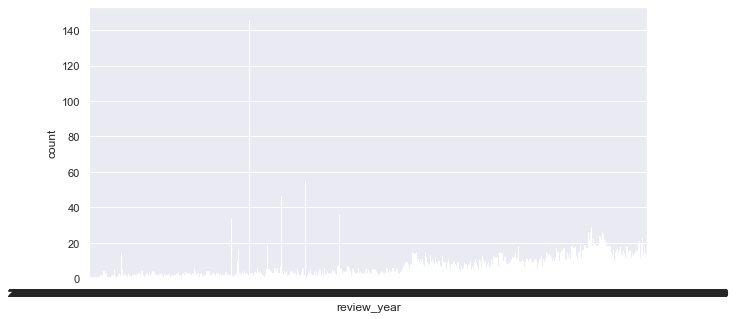

In [57]:
df['review_year'] = df.review_date = pd.to_datetime(df.review_date)
df.sort_values("review_year",inplace=True)
# 销量
plt.figure(figsize=(10,5))
sns.countplot(x="review_year", data=df)

In [52]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
11469,US,43740490,R2XM83JYE2KDE2,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,3,320,332,N,Y,"Some pluses, some minuses",This is my only experience with an ionic hair ...,2002-03-02
11468,US,38947355,R3JMGN42OJCL97,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,78,87,N,N,Excellent for fine/limp hair,This hairdryer far exceeded my expection for<B...,2002-04-20
11467,US,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,4,4,N,Y,The best dryer!!!,"I love this dryer not only is it QUIET, it rea...",2002-07-13
11466,US,43977044,R2JQPUYU65C4QD,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,1,26,32,N,N,Disappointment with dryer,I purchased it because it was supposed to be q...,2002-08-13
11465,US,35599734,R2O50YNP83CG34,B000065DJY,919751065,revlon 1875w volumizing hair dryer,Beauty,5,14,18,N,N,great hair!,"I just purchased this dryer, and I really like...",2002-08-21


In [56]:
df = pd.read_csv("D:/anydata/data/hair_dryer.tsv", sep='\t') # 读取tsv格式数据
pd.to_datetime(df.review_date).dt.strftime("%m/%Y")

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
11465    2002
11466    2002
11467    2002
11468    2002
11469    2002
Name: review_date, Length: 11470, dtype: object

In [6]:
text = 'Natural language processing (NLP) Is A SuBfield Of Computer scIence, inFormation eNgineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data!?!!....'

In [7]:
# 大小写转换
lower = text.lower()
lower

'natural language processing (nlp) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data!?!!....'

In [8]:
# 标点符号的处理
#string.punctuation中包含英文的标点，我们将其放在待去除变量remove中
#函数需要三个参数，前两个表示字符的映射，我们是不需要的。
remove = str.maketrans('','',string.punctuation) 
without_punctuation = lower.translate(remove)
without_punctuation

'natural language processing nlp is a subfield of computer science information engineering and artificial intelligence concerned with the interactions between computers and human natural languages in particular how to program computers to process and analyze large amounts of natural language data'

In [9]:
tokens = without_punctuation.split()

In [17]:
stopwords_path = 'D:/anydata/data/stopword.txt'
stopwords_list = [line.rstrip() for line in open(stopwords_path)]

In [18]:
# 去除停用词
without_stopwords = [w for w in tokens if not w in stopwords_list]
without_stopwords

['natural',
 'language',
 'processing',
 'nlp',
 'subfield',
 'computer',
 'science',
 'information',
 'engineering',
 'artificial',
 'intelligence',
 'concerned',
 'interactions',
 'computers',
 'human',
 'natural',
 'languages',
 'particular',
 'program',
 'computers',
 'process',
 'analyze',
 'amounts',
 'natural',
 'language',
 'data']

In [19]:
import nltk.stem
s = nltk.stem.SnowballStemmer('english')  #参数是选择的语言
cleaned_text = [s.stem(ws) for ws in without_stopwords]
print(cleaned_text)

['natur', 'languag', 'process', 'nlp', 'subfield', 'comput', 'scienc', 'inform', 'engin', 'artifici', 'intellig', 'concern', 'interact', 'comput', 'human', 'natur', 'languag', 'particular', 'program', 'comput', 'process', 'analyz', 'amount', 'natur', 'languag', 'data']


In [20]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
[wnl.lemmatize(ws) for ws in cleaned_text]

['natur',
 'languag',
 'process',
 'nlp',
 'subfield',
 'comput',
 'scienc',
 'inform',
 'engin',
 'artifici',
 'intellig',
 'concern',
 'interact',
 'comput',
 'human',
 'natur',
 'languag',
 'particular',
 'program',
 'comput',
 'process',
 'analyz',
 'amount',
 'natur',
 'languag',
 'data']

# 词云

In [ ]:
#-*-coding:utf-8-*-
import sys
import os
from pprint import pprint
import codecs
import json
from collections import Counter, defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

path = sys.path[0] + os.sep

def wc_from_text(str, fn):
	'''根据字符串进行统计，并生成词云图'''
    wc = WordCloud(
        background_color="white",  # 设置背景为白色，默认为黑色
        width = 1500,  # 设置图片的宽度
        height= 960,  # 设置图片的高度
        margin= 10  # 设置图片的边缘
    ).generate(s)
    plt.imshow(wc)  # 绘制图片
    plt.axis("off")  # 消除坐标轴
    plt.show()  # 展示图片
    # wc.to_file(path + fn)  # 保存图片

def wc_from_word_count(word_count, fp):
	'''根据词频字典生成词云图'''
    wc = WordCloud(
        max_words=500,  # 最多显示词数
        # max_font_size=100,  # 字体最大值
        background_color="white",  # 设置背景为白色，默认为黑色
        width = 1500,  # 设置图片的宽度
        height= 960,  # 设置图片的高度
        margin= 10  # 设置图片的边缘
    )
    wc.generate_from_frequencies(word_count)  # 从字典生成词云
    plt.imshow(wc)  # 显示词云
    plt.axis('off')  # 关闭坐标轴
    plt.show()  # 显示图像
    wc.to_file(fp)  # 保存图片

def generate_dict_from_file(fp):
    with codecs.open(fp, 'r', 'utf-8') as source_file:
        for line in source_file:
            dic = json.loads(line)
            yield dic

def main(data_fp, pic_fp):
    word_count = defaultdict(lambda: 0)
    for dic in generate_dict_from_file(data_fp):
        words = dic['content'].split(' ')
        for word in words:
        	word_count[word] += 1
    with codecs.open(path + 'word_count.json', 'w', 'utf-8') as f:
        json.dump(word_count, f, ensure_ascii=False)
    wc_from_word_count(word_count, pic_fp)

if __name__ == '__main__':
    s = 'access restored ban remains blocked government order accessible aid proxy provider telecom restored access celebrating government revoked censorship order newsroom waiting appeal court lawsuit government allowed constitution reporting stringer spread dedication journalism critical reporting brought outlet respect recognition landed blacklist authoritarian regime dominate permanently blocked severe intolerance critical journalism authority deny domestic access occasional basis regional outlet sensitive issue incident hard technical glitch deliberately blocked access depending covered government corruption human abuse social discontent policy freedom protested blocked violent conflict ethnic resident authority imposed permanent ban parliament resolution lawmaker addressed conflict recommended action government resolution reason obtaining court order law shutting outlet introduce measure domain space resolution authority'
    # wc_from_text(s, 'wc1.jpg')
    # word_count = Counter(s.split(' '))
    # wc_from_word_count(word_count, 'wc2.jpg')
    data_fp = path + 'result.json'
    pic_fp = path + 'word_cloud_uz.jpg'
    main(data_fp, pic_fp)
